In [87]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import datetime

articleDetails = pd.read_pickle('article_details.pkl')

In [88]:
# Remove article posted on 2015-01-03, because it has no details about vistors/times/views
articleDetails = articleDetails.drop([articleDetails.loc[articleDetails['Date'] == "2015-01-03"].index[0]])
# Remove article posted with the title of "Annual Seven-Up"
articleDetails = articleDetails.drop([articleDetails.loc[articleDetails['Title'] == "Annual Seven-Up"].index[0]])
# Remove article posted on 2022-03-19, because it has no details about visitors/times/views
articleDetails = articleDetails.drop([articleDetails.loc[articleDetails['Date'] == "2022-03-19"].index[0]])

In [89]:
# Get visitor information: visitor count, visit count, page view count
def getVisitorNumbers(string):
    pre_split_size = len(string)
    post_split_size = len(string.split("visitors", 1)[0])
    if pre_split_size != post_split_size:
        visitors = int(re.search(r'\d+', string.split("visitors", 1)[0].replace(",", "")[::-1]).group()[::-1])
    else:
        visitors = int(0)
    return visitors

def getVistTimesNumbers(string):
    pre_split_size = len(string)
    post_split_size = len(string.split("times", 1)[0])
    if pre_split_size != post_split_size:
        visits = int(re.search(r'\d+', string.split("times", 1)[0].replace(",", "")[::-1]).group()[::-1])
    else:
        pre_split_size = len(string)
        post_split_size = len(string.split("visits", 1)[0])
        if pre_split_size != post_split_size:
            visits = int(re.search(r'\d+', string.split("visits", 1)[0].replace(",", "")[::-1]).group()[::-1])
        else:
            visits = int(0)
    return visits

def getPageViewNumbers(string):
    pre_split_size = len(string)
    post_split_size = len(string.split("pages", 1)[0])
    if pre_split_size != post_split_size:
        visits = int(re.search(r'\d+', string.split("pages", 1)[0].replace(",", "")[::-1]).group()[::-1])
    else:
        pre_split_size = len(string)
        post_split_size = len(string.split("pageviews", 1)[0])
        if pre_split_size != post_split_size:
            visits = int(re.search(r'\d+', string.split("pageviews", 1)[0].replace(",", "")[::-1]).group()[::-1])
        else:
            visits = int(0)
    return visits

def getVisitsPerVisitor(visits, visitors):
    return (visits / visitors)

In [90]:
articleDetails['Visitors'] = articleDetails.apply(lambda row : getVisitorNumbers(row['Article Details']), axis = 1)
articleDetails['Visits'] = articleDetails.apply(lambda row : getVistTimesNumbers(row['Article Details']), axis = 1)
articleDetails['Page Visits'] = articleDetails.apply(lambda row : getPageViewNumbers(row['Article Details']), axis = 1)

# Remove article posted on 2010-11-06, because it has no details about visitors
articleDetails = articleDetails.drop([articleDetails.loc[articleDetails['Date'] == "2010-11-06"].index[0]])

articleDetails['Visits per Visitor'] = articleDetails.apply(lambda row : getVisitsPerVisitor(row['Visits'], row['Visitors']), axis = 1)

In [91]:
articleDetails.head()

,Date,Link,Title,Article Details,Post Time,List Links,Number of Links,Visitors,Visits,Page Visits,Visits per Visitor
0,2022-06-04,https://order-order.com/2022/06/04/saturday-7-...,Saturday 7-Up,"This week 158,742 visitors visited 452,385 tim...",07:35,[EXCLUSIVE: Yvette Cooper’s Son Led Trans Righ...,7,158742,452385,699803,2.849813
1,2022-05-28,https://order-order.com/2022/05/28/saturday-7-...,Saturday 7-Up,"This week 192,138 visitors visited 604,322 tim...",07:30,[Jess Phillips Investigation Concludes Multipl...,7,192138,604322,966584,3.145250
2,2022-05-21,https://order-order.com/2022/05/21/saturday-7-...,Saturday 7-Up,"This week 201,390 visitors visited 582,067 tim...",07:30,[Andrew Rosindell’s Office Not Answering Queri...,7,201390,582067,944991,2.890248
3,2022-05-07,https://order-order.com/2022/05/07/saturday-7-...,Saturday 7-Up,"This week 161,673 visitors visited 489,154 tim...",07:30,[LibDem Candidate’s Pornstar Sideline Revealed...,7,161673,489154,765033,3.025576
4,2022-04-30,https://order-order.com/2022/04/30/saturday-7-...,Saturday 7-Up,"This week 185,091 visitors visited 548,002 tim...",07:30,"[Flashback: What They Said At the Time, READ I...",7,185091,548002,868770,2.960717


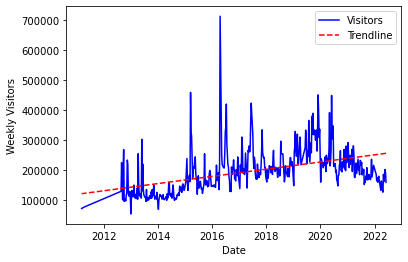

In [92]:
plt.plot(articleDetails['Date'], articleDetails['Visitors'], color='blue', label="Visitors")

# To perform the linear regression we need the dates to be numeric
articleDetails['Date_num'] = articleDetails['Date'].map(datetime.date.toordinal)

#calculate equation for trendline
z = np.polyfit(articleDetails['Date_num'],articleDetails['Visitors'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(articleDetails['Date'], p(articleDetails['Date_num']), color='red', label="Trendline", linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Weekly Visitors")

plt.legend()
#plt.show()
plt.savefig('images/visitors.png',bbox_inches='tight')

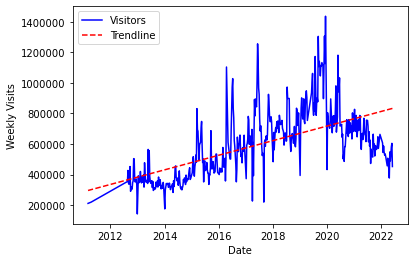

In [93]:
plt.plot(articleDetails['Date'], articleDetails['Visits'], color='blue', label="Visits")

# To perform the linear regression we need the dates to be numeric
articleDetails['Date_num'] = articleDetails['Date'].map(datetime.date.toordinal)

#calculate equation for trendline
z = np.polyfit(articleDetails['Date_num'],articleDetails['Visits'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(articleDetails['Date'], p(articleDetails['Date_num']), color='red', label="Trendline", linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Weekly Visits")

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.legend()
#plt.show()
plt.savefig('images/visits.png',bbox_inches='tight')

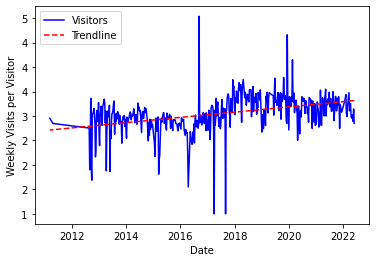

In [94]:
plt.plot(articleDetails['Date'], articleDetails['Visits per Visitor'], color='blue', label="Visits per Visitor")

# To perform the linear regression we need the dates to be numeric
articleDetails['Date_num'] = articleDetails['Date'].map(datetime.date.toordinal)

#calculate equation for trendline
z = np.polyfit(articleDetails['Date_num'],articleDetails['Visits per Visitor'], 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(articleDetails['Date'], p(articleDetails['Date_num']), color='red', label="Trendline", linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Weekly Visits per Visitor")

from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.legend()
#plt.show()
plt.savefig('images/visits_per_visitor.png',bbox_inches='tight')

In [100]:
# Average weekly increase
def averageIncrease(df, col_name, int_in):
    # Create array of deltas. Replace nan and negative values with zero
    a = np.maximum(df[col_name] - df[col_name].shift(), 0).replace(np.nan, 0)
    # Count non-zero values
    count = np.count_nonzero(a)

    if count == 0:
        # If only zero values… there is no increase
        return 0
    else:
        if int_in == True:
            return int(np.sum(a) / count)
        elif int_in == False:
            return np.sum(a) / count
        else:
            print("Boolean value must be entered for whether the return should be an integer or not.")

print(averageIncrease(articleDetails, 'Visitors', True))
print(averageIncrease(articleDetails, 'Visits', True))
print(averageIncrease(articleDetails, 'Visits per Visitor', False))

32835
75583
0.23483643898984496
